In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from sklearn.feature_selection import SelectKBest   #ricordali di toglierli nel caso non servono 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors
np.random.seed(0)
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')


# Loding data and Data Preparation

In [2]:
train = pd.read_csv("Data/train.csv")
train.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
0,0.650511,1.158653,0.580172,2.230388,3.179675,0.533686,0.440101,5.033898,0.200985,1.589221,...,0.047287,0.337121,0.203356,0.191360,0.590874,0.112145,0.110109,0.160637,1.329248,t-CS-m
1,0.365907,0.651296,0.810468,2.597217,4.131603,0.537554,0.249235,6.099538,0.226362,1.700578,...,0.521112,0.419544,0.231619,0.393897,0.252572,0.352687,0.085545,0.328537,1.008023,t-SC-s
2,0.260145,0.397996,0.229522,2.643311,4.303648,0.268394,0.050916,3.130455,0.273792,2.534531,...,0.047407,0.053130,0.096325,0.257402,0.246015,0.203979,0.039188,0.008315,1.193634,c-SC-s
3,0.239489,0.271240,0.766816,1.872419,2.424971,0.322269,0.386791,2.351832,0.034265,0.472725,...,0.273651,0.162382,0.234056,0.180657,0.351388,0.103896,0.302341,0.166020,0.689970,c-CS-m
4,0.617112,0.751737,0.050685,2.356175,3.494138,0.506875,0.310644,3.855825,0.309879,1.033428,...,0.172488,0.014086,0.191145,0.149622,0.310434,0.151685,0.180055,0.383039,1.737274,t-CS-s


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         367 non-null    float64
 1   ITSN1_N          367 non-null    float64
 2   BDNF_N           367 non-null    float64
 3   NR1_N            367 non-null    float64
 4   NR2A_N           367 non-null    float64
 5   pAKT_N           367 non-null    float64
 6   pBRAF_N          367 non-null    float64
 7   pCAMKII_N        367 non-null    float64
 8   pCREB_N          367 non-null    float64
 9   pELK_N           367 non-null    float64
 10  pERK_N           367 non-null    float64
 11  pJNK_N           367 non-null    float64
 12  PKCA_N           367 non-null    float64
 13  pMEK_N           367 non-null    float64
 14  pNR1_N           367 non-null    float64
 15  pNR2A_N          367 non-null    float64
 16  pNR2B_N          367 non-null    float64
 17  pPKCAB_N        

## Class Labels

In [4]:
labelClass = train['class'] # the class column
le = preprocessing.LabelEncoder()
codedLabel = le.fit_transform(labelClass)  # fitta il trasformatore e mi ritorna le label 

## Preliminary Analysis 

### Data visualizzation 
In order to have an idea of our data, we can plot them to see if they are correleted. We can think of using the pairplot to show how each feature is correlated to the other but this is impossible due to the high number of features. We can instead, to begin with, plotting the correlation matrix. And then tray to reduce the number of features.

As we can see using the correlation matrix the features are moderately correlated.

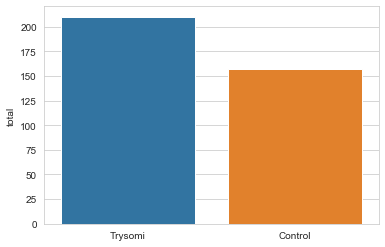

In [5]:
#plotting the number of mouse divided in 'control' and 'trisomy'
trysomi = train['class'].str.contains("t-")
control = train['class'].str.contains("c-")

trysomi_vs_control = pd.DataFrame({'Trysomi':[sum(trysomi)], 'Control':[sum(control)]}, index = ['total']).T
sns.barplot(x = ['Trysomi', 'Control'], y = "total", data = trysomi_vs_control)

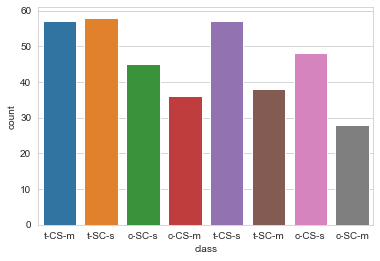

In [6]:
# number of samples the 8 classes

sns.countplot(train['class'])

In [7]:
def visualizeCorrMat(data): # Create correlation matrixc
    f, ax = plt.subplots(figsize = (11, 9))
    mask = np.triu(np.ones_like(data, dtype = np.bool))
    cmap = sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(data, mask = mask, cmap = cmap, vmax = 1, center = 0,
            square = True, linewidths = .9, cbar_kws = {"shrink": .5})
    


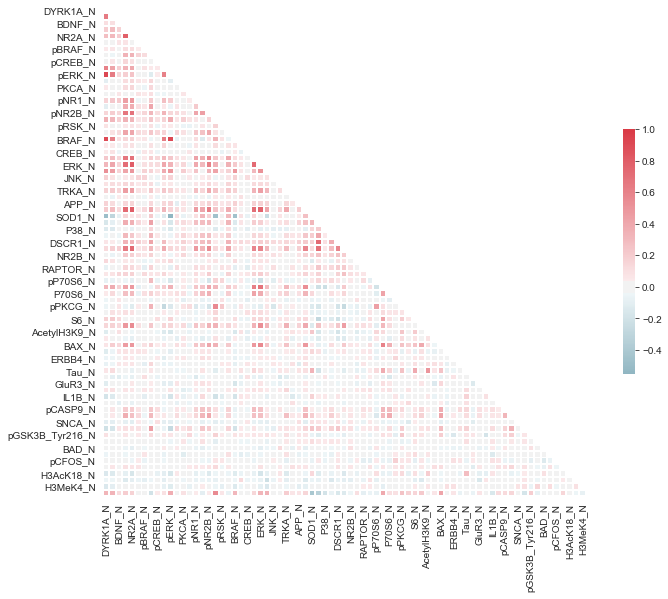

In [8]:
corrMat = train.corr()
visualizeCorrMat(corrMat)

In [9]:
# we drop the target class
train = train.drop(columns = 'class', axis = 1)

## Variance visualizzation
In ordert to understand our daset we show the variance among the features, it is always a good practice to analyze the variance to understand if our data need normalization. In our particolar in our dataset presentslots of features with low variance e some features with high variance.

Max Variance value :	 1.926769317467468
Min Variance value :	 0.00040275706051909544
Mean Variance value:	 0.09739601260421206


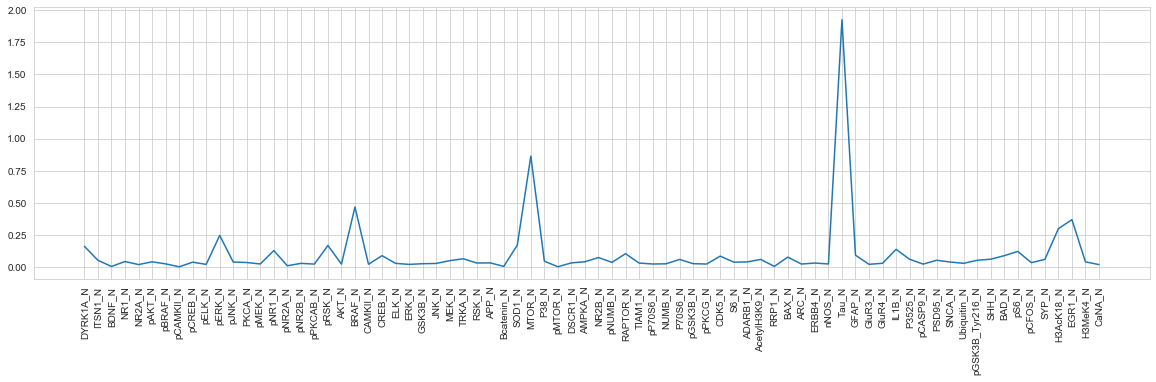

In [10]:
def varianceVisualization(data):
    print("Max Variance value :\t", data.var().max())
    print("Min Variance value :\t", data.var().min())
    print("Mean Variance value:\t", data.var().mean())
    plt.subplots(figsize = (20, 5))
    plot = sns.lineplot(x = data.var().index, y = data.var().values)
    plot.set_xticklabels(data,rotation = 90)
   # plt.figure(figsize = (25, 6))
    #plt.xticks(rotation = 90)
    #plt.plot(data.var())
    
varianceVisualization(train)

## Data normalization 
In order to deal with this problem we perform a data normalizaion, using the min_max_scaler

Max Variance value :	 1.0027322404371597
Min Variance value :	 1.0027322404371575
Mean Variance value:	 1.0027322404371584


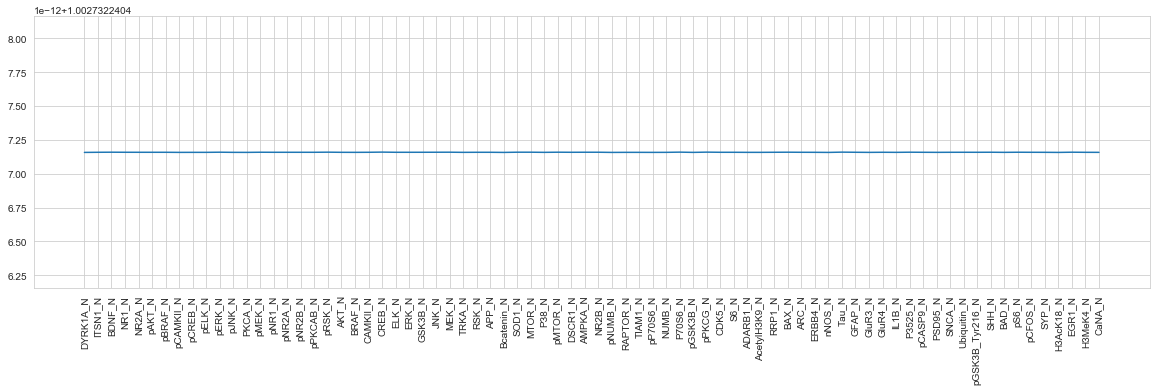

In [11]:
standard_scaler = preprocessing.StandardScaler().fit(train)
train = pd.DataFrame(standard_scaler.transform(train), columns = train.columns)
varianceVisualization(train)


We can now visualize the PCs to have a look of the number of dimension we need to separate our data. Let's calculate the PCs and visualize the persentage of variance expressed by each component

In [12]:
def principalComponent(data, n_comp): # compute PC and % variation expressed by the PCs
    #scaled_Train = scale(train.drop(['class'], axis = 1))
    pca = PCA(n_comp) 
    return pca.fit_transform(data), np.round(100 * pca.explained_variance_ratio_, decimals = 2), pca.singular_values_

def visualizeComponentVariance(data, ylab, title, cum = False):
    plot_labels = ['PC' + str(s) for s in range(1, len(data) + 1)]
    plt.figure(figsize = (44, 10))
    if(cum == True):
        colormat = np.where(data > 90, '#ff7f0e','#1f77b4')
    else:
         colormat = np.where(per_var < 1, '#ff7f0e','#1f77b4')
    plt.bar(x = range(1, len(data) + 1), height = data, tick_label = plot_labels, color = colormat)
    #plt.hlines(y = 90, xmin = 1, xmax = len(cum_var) + 1)
    plt.ylabel(ylab, size = 30)
    plt.xlabel('Principal Component', size = 30)
    plt.xticks(rotation = 45, size = 25)
    plt.yticks(size = 25)
    plt.title(title, size = 40)
    plt.show()
    return plot_labels

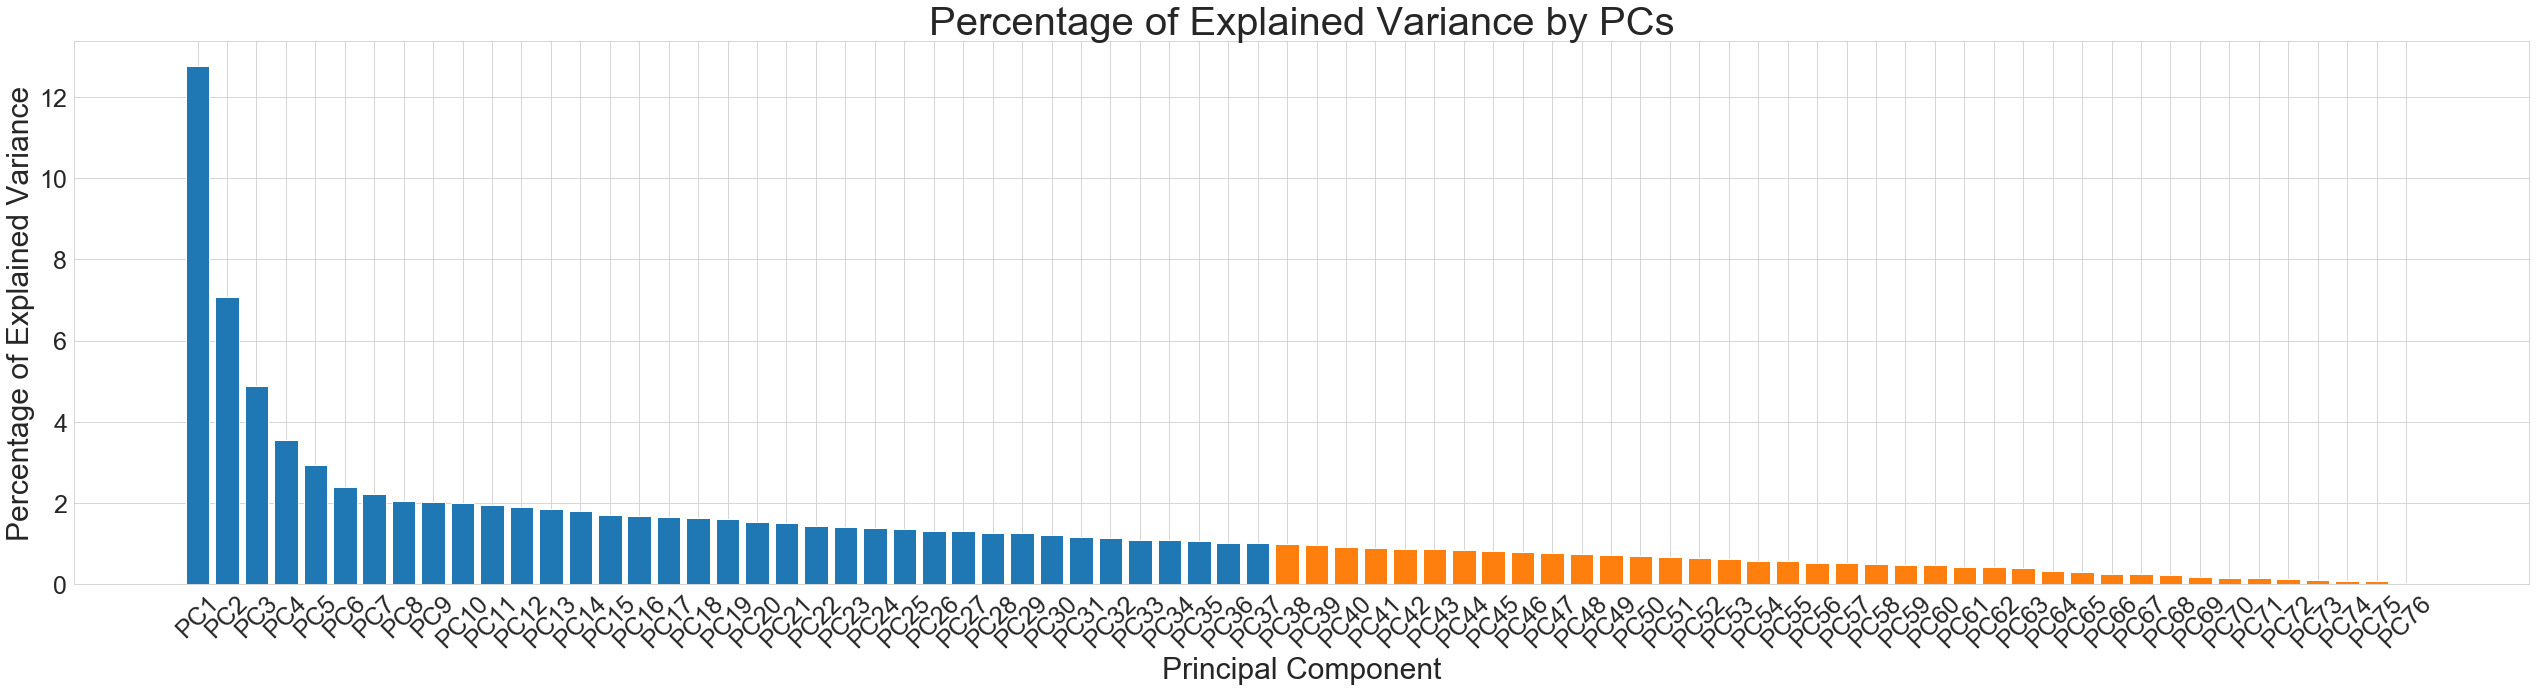

In [13]:
principalComp, per_var, singular_values = principalComponent(train, min(train.shape))
plot_labels = visualizeComponentVariance(per_var, 'Percentage of Explained Variance', 'Percentage of Explained Variance by PCs')

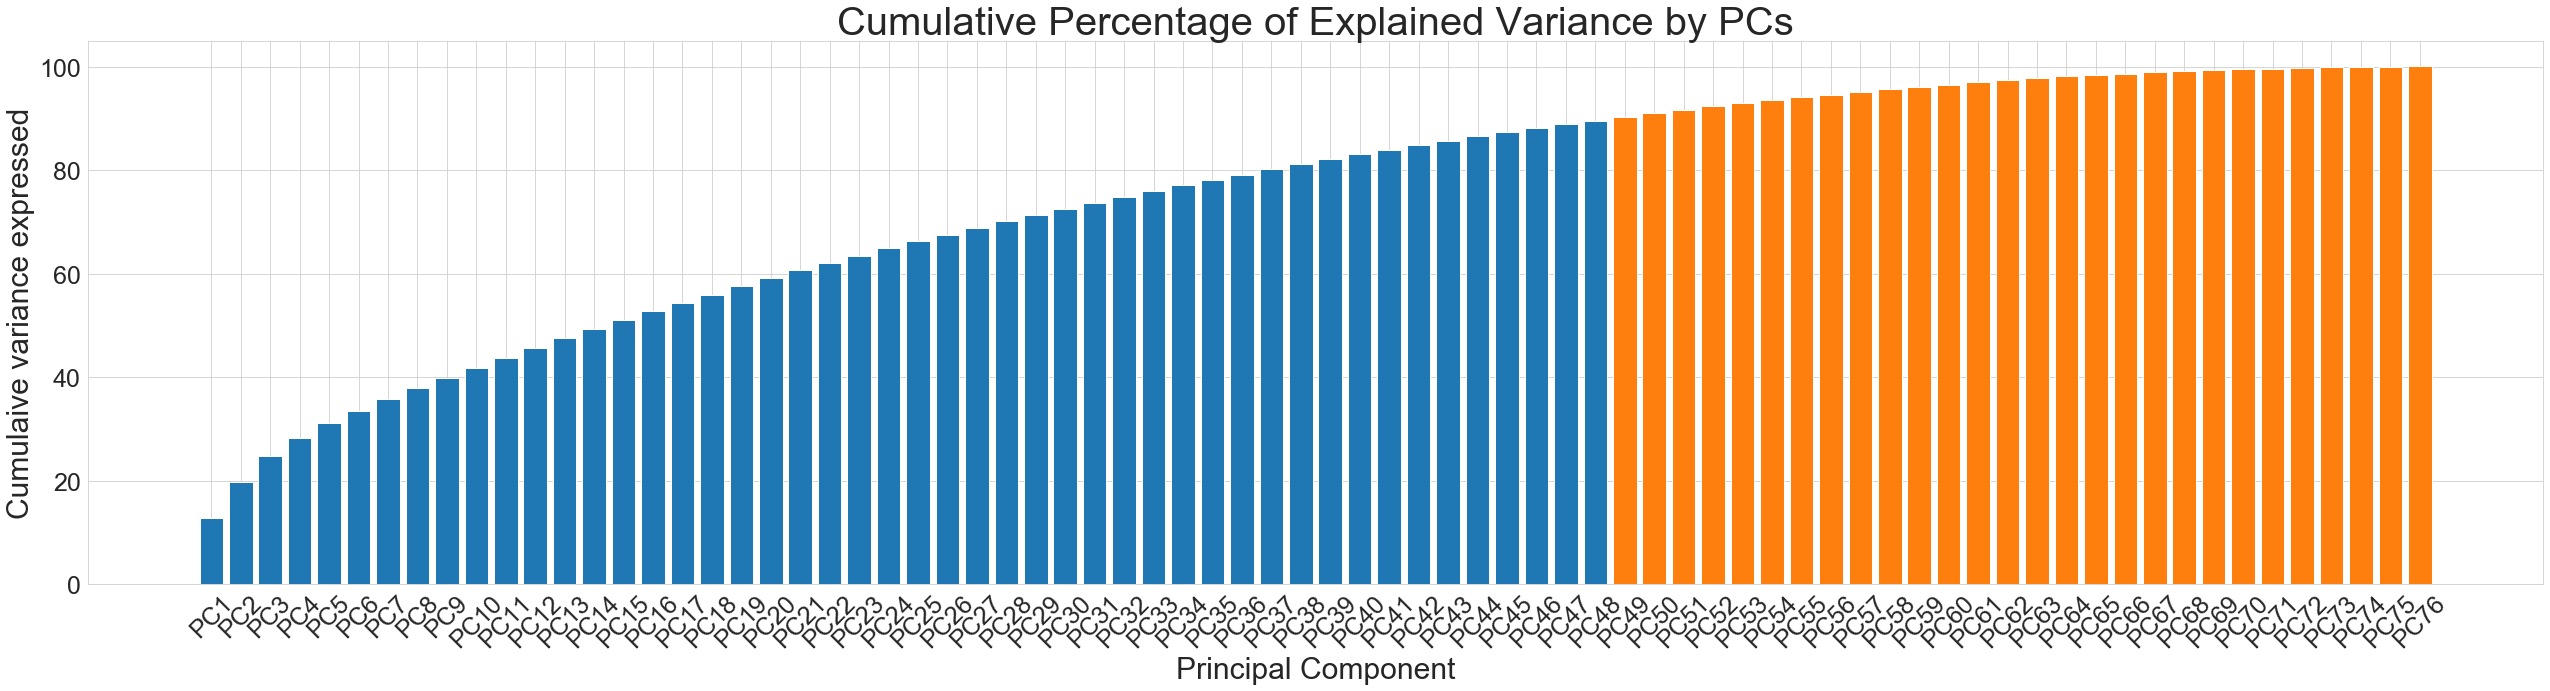

In [14]:
_ = visualizeComponentVariance(per_var.cumsum(), 'Cumulaive variance expressed', 
                           'Cumulative Percentage of Explained Variance by PCs', True)

We can see that the percentage of variance expressed by each orincipal component is much and only with 48 PCs we reach a cumulative variance expressed equal to the 90%. Let's have a look to a plot using the first 3 PCs. This will shows that with only 3 PCs we can't perfectly separate the data.

In [15]:
le.inverse_transform(unique_labelClass)

NameError: name 'unique_labelClass' is not defined

In [ ]:
def plotPCA(Label, pc, **label_):
    unique_labelClass = np.unique(Label) 
    nlabels = len(unique_labelClass) 
    fig = plt.figure(figsize = (15, 10))
    ax = fig.add_subplot(111, projection = '3d')
    col = ('tab10' if nlabels <= 10 else  ('tab20' if nlabels <= 20 else 'hsv'))
    cmap = plt.cm.get_cmap('nipy_spectral', nlabels)
    smap = cm.ScalarMappable(norm = mcolors.Normalize(unique_labelClass.min(), 
                                                      unique_labelClass.max() + 1),   cmap = cmap)
    ax.scatter(xs = pc.PC1, ys = pc.PC2, zs = pc.PC3, marker = '.', s = 200, 
               c = Label, cmap = cmap)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    cbar = plt.colorbar(mappable = smap, label = 'Label')
    
def plot2dPCA(Label, pc1, pc2):
    unique_labelClass = np.unique(Label) 
    nlabels = len(unique_labelClass) 
    fig = plt.figure(figsize = (15, 10))
    col = ('tab10' if nlabels <= 10 else  ('tab20' if nlabels <= 20 else 'hsv'))
    cmap = plt.cm.get_cmap('nipy_spectral', 8)
    smap = cm.ScalarMappable(norm = mcolors.Normalize(unique_labelClass.min(), 
                                                      unique_labelClass.max() + 1),cmap = cmap)
    plt.scatter(x = pc1, y = pc2, marker = '.', s = 200, c = Label, cmap = cmap)
    plt.colorbar(mappable = smap, label = 'Label')

In [ ]:
#per ora ho ignorato " _ " la percentuale di varianza espressa e i singular values
pc_plot, _, _ = principalComponent(train, 3)
pc_plot = pd.DataFrame(pc_plot, columns = plot_labels[0 : 3])

plotPCA(codedLabel, pc_plot)
plot2dPCA(codedLabel, pc_plot.PC1, pc_plot.PC2)
plot2dPCA(codedLabel, pc_plot.PC1, pc_plot.PC3)
plot2dPCA(codedLabel, pc_plot.PC2, pc_plot.PC3)